In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder  , StandardScaler , RobustScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , BernoulliNB , CategoricalNB , MultinomialNB , ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split , KFold
from imblearn.over_sampling import SMOTE


In [224]:
# Cargamos el dataset
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [225]:
#Verificamos la dimensión del dataset
df.shape

(5110, 12)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [227]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [228]:
#Eliminamos la columna id
df.drop('id' , axis = 1 , inplace = True)

In [229]:
#Chequeando valores nulos
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [230]:
#Interpolación lineal para completar faltantes de la columna BMI 
df['bmi']=df['bmi'].interpolate()

In [231]:
#Verificación que ya no hay valores nulos
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [232]:
#Verificamos si hay duplicados
df.duplicated().sum()

0

Realizamos gráficos para estudiar los features

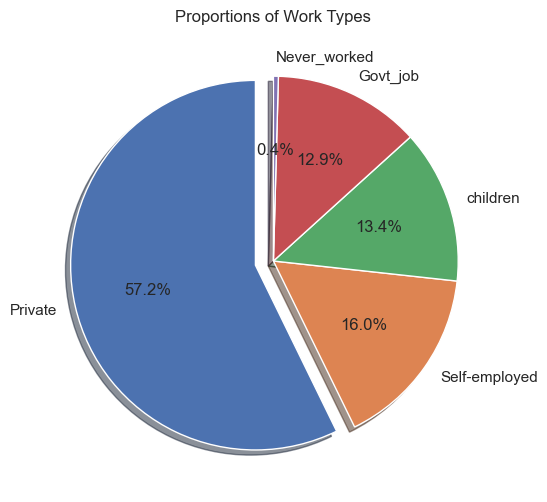

In [233]:
dfworktype=df['work_type']

count=dfworktype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Work Types')
plt.show()

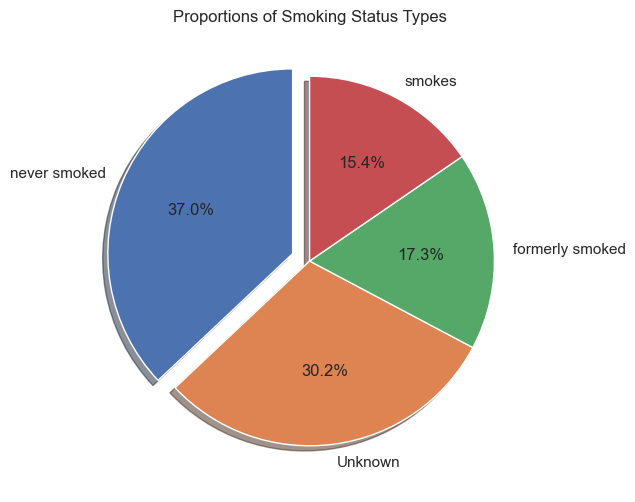

In [234]:
dfsmoketype=df['smoking_status']

count=dfsmoketype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Smoking Status Types')
plt.show()

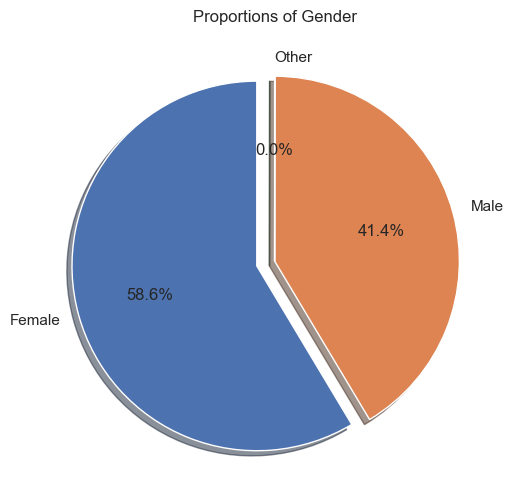

In [235]:
dfsmoketype=df['gender']

count=dfsmoketype.value_counts()
explode = [0.1 if i == 0 else 0 for i in range (len(count))]
plt.figure(figsize=(10,6))
plt.pie(count,labels=count.index,autopct='%1.1f%%', startangle=90,shadow=True,explode=explode)
plt.title('Proportions of Gender')
plt.show()

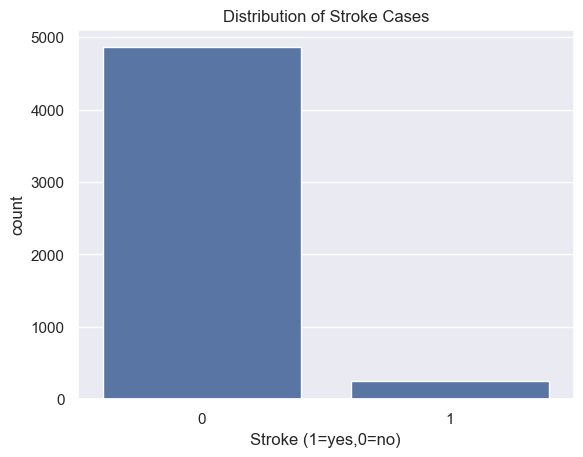

In [236]:
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (1=yes,0=no)')
plt.show()

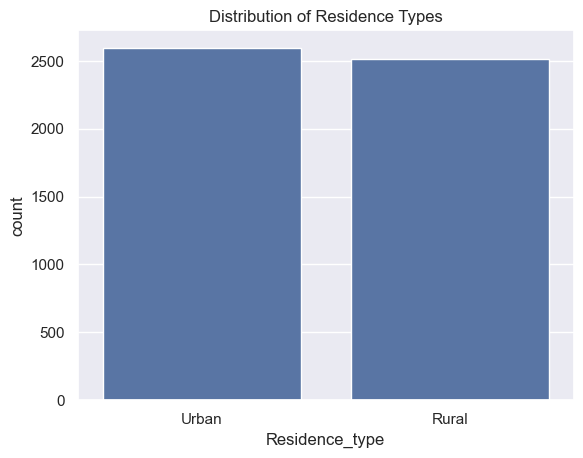

In [237]:
sns.countplot(x='Residence_type', data=df)
plt.title('Distribution of Residence Types')
plt.show()

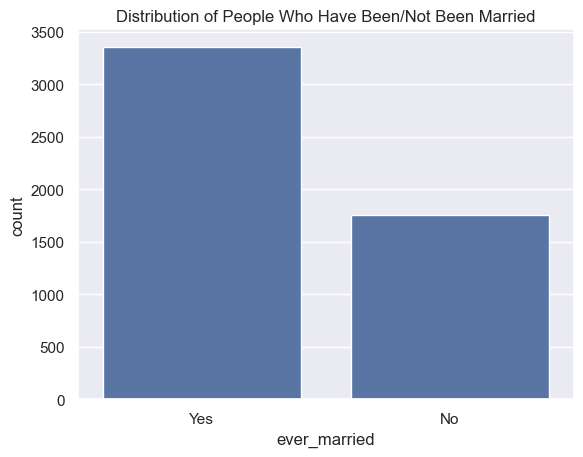

In [238]:
sns.countplot(x='ever_married', data=df)
plt.title('Distribution of People Who Have Been/Not Been Married')
plt.show()

<Axes: title={'center': 'Correlation Map'}>

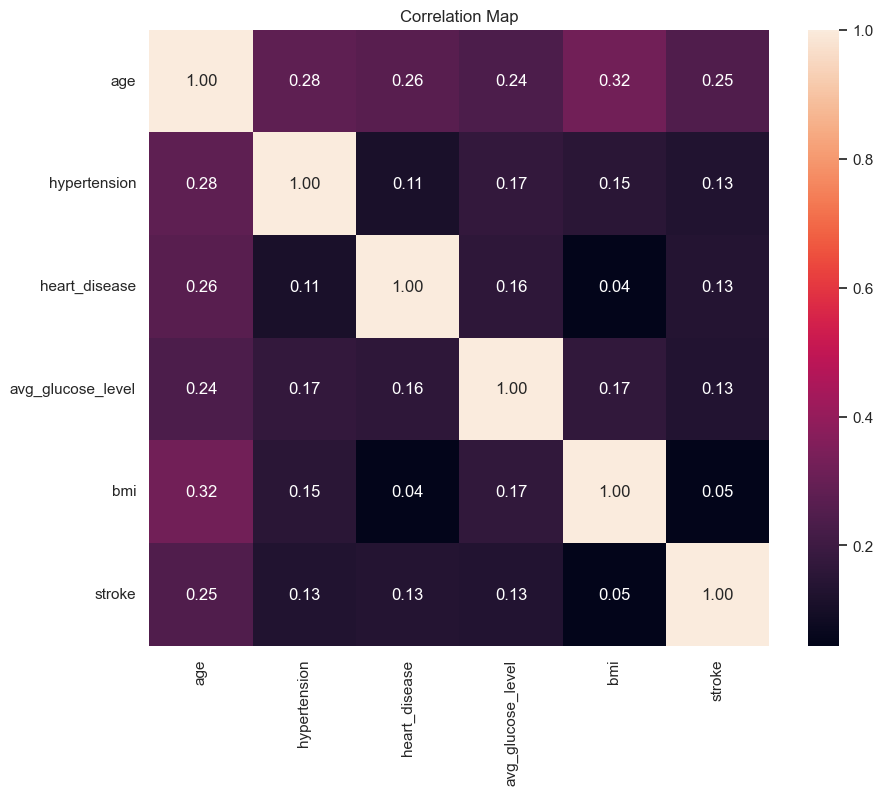

In [239]:
# Realizamos el mapa de correlación entre variables numéricas
number = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(number.corr(),annot=True, fmt='.2f')

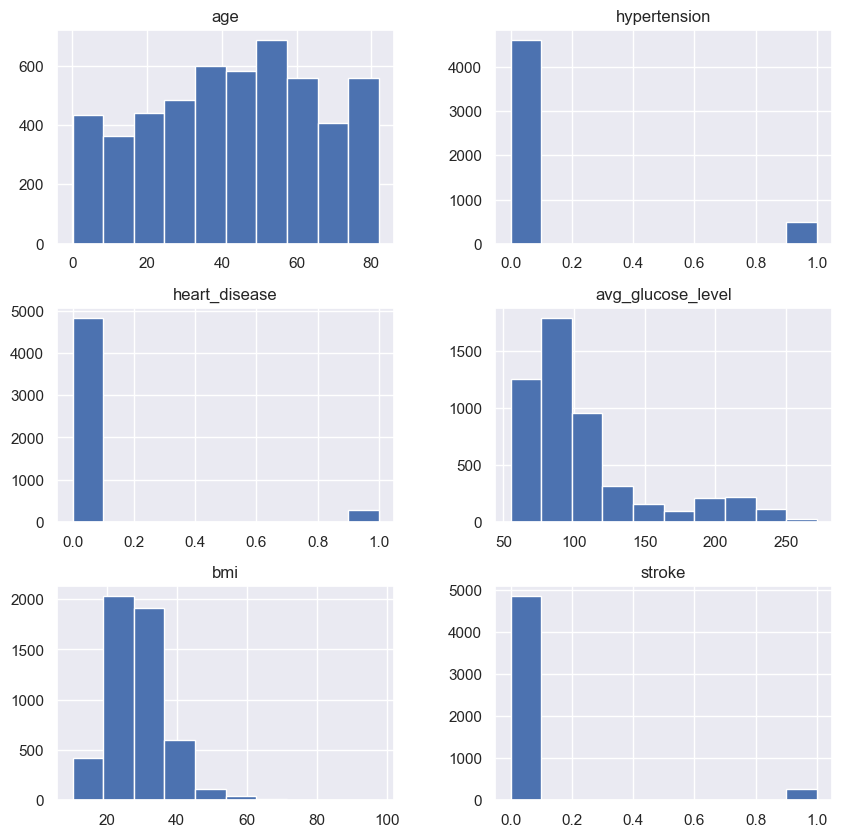

In [240]:
df.hist(figsize= (10 , 10))
plt.show()

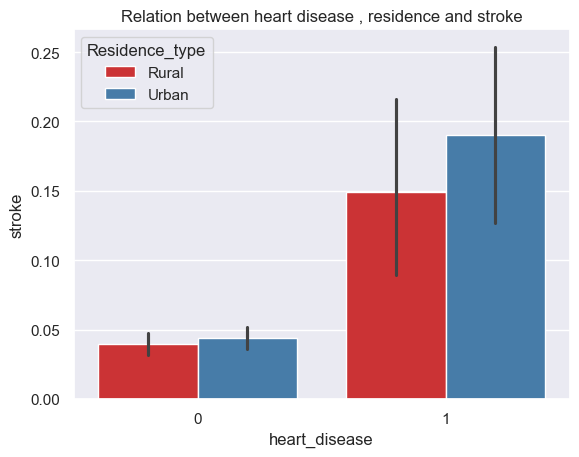

In [241]:
sns.barplot(data = df , x='heart_disease' , y = 'stroke' , hue ='Residence_type' , palette = 'Set1')
plt.title('Relation between heart disease , residence and stroke')
plt.show()

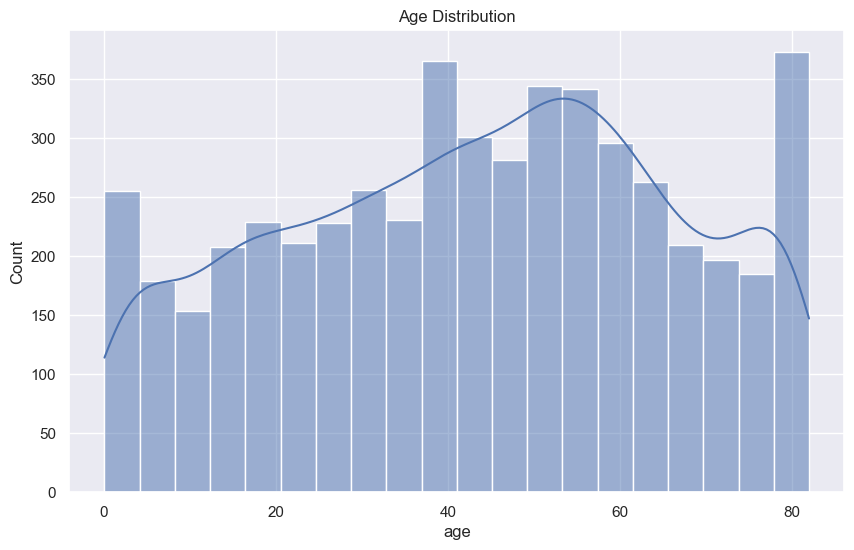

In [242]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", kde=True)
plt.title('Age Distribution')
plt.show()

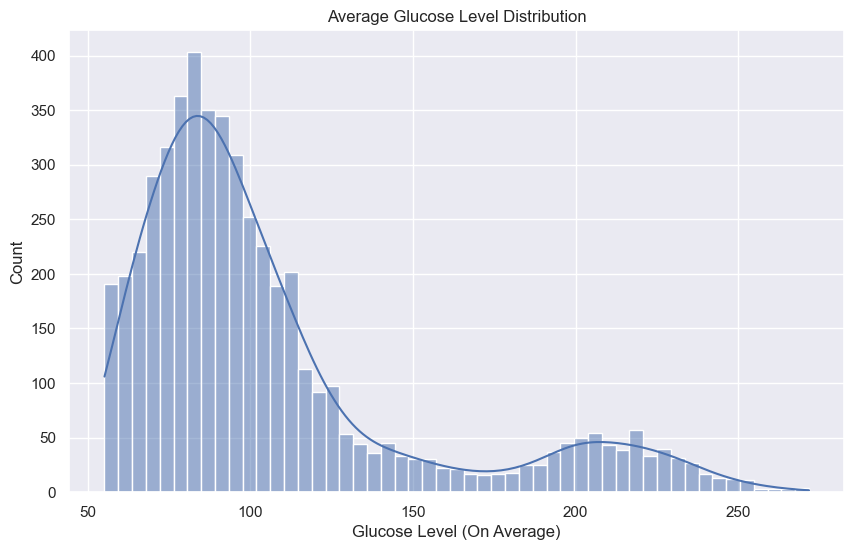

In [243]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="avg_glucose_level", kde=True)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Glucose Level (On Average)')
plt.show()

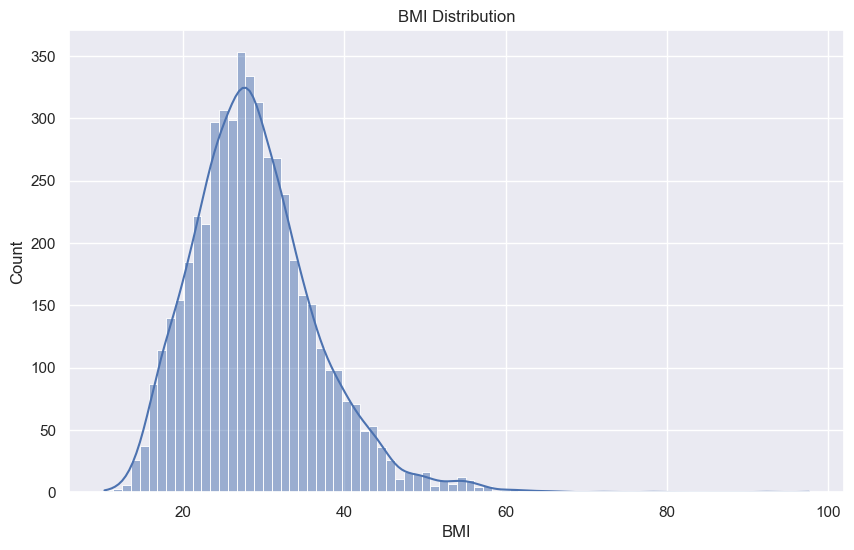

In [244]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="bmi", kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

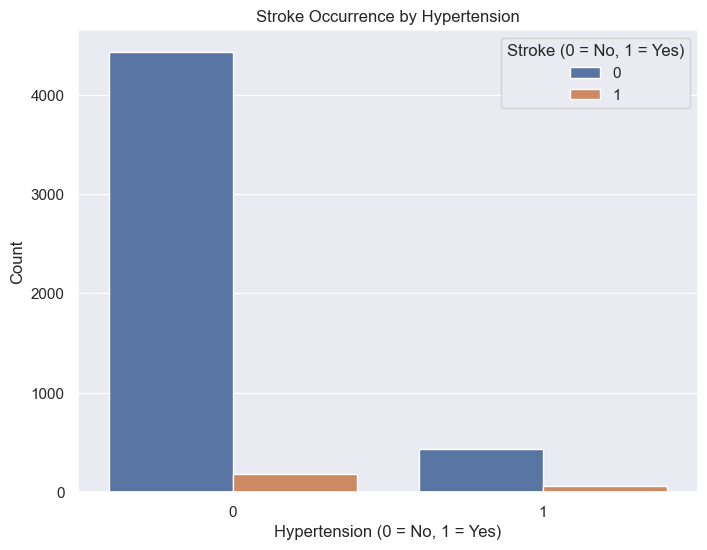

In [245]:
plt.figure(figsize=(8, 6))

sns.countplot(x='hypertension', hue='stroke', data=df)

plt.title('Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke (0 = No, 1 = Yes)')


plt.show()

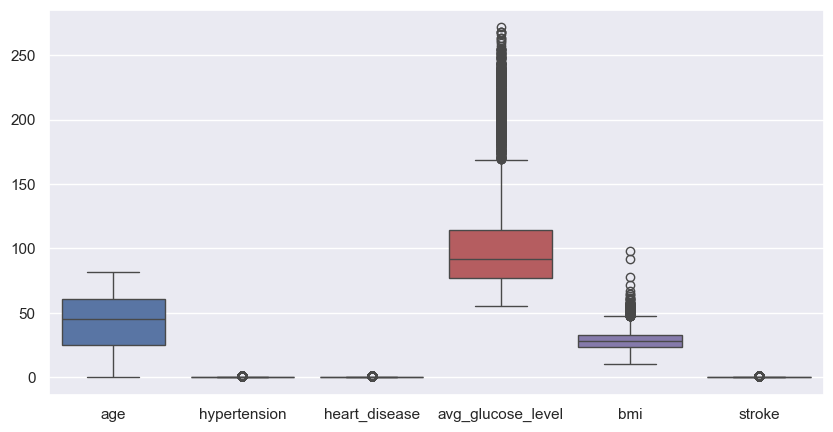

In [246]:
plt.figure(figsize=(10 , 5))
sns.boxplot(data = df)
plt.show("Checking if there is outliers")
plt.show()

Encoding

In [247]:
# Transformamos las variables categóricas a numéricas
cols = df.select_dtypes('object').nunique().sort_values(ascending=False).index
cols

Index(['work_type', 'smoking_status', 'gender', 'ever_married',
       'Residence_type'],
      dtype='object')

In [248]:
for col in cols:
    lb = LabelEncoder()
    df[col] = lb.fit_transform(df[col])

In [249]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,34.55,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1


Splitting and Scaling

In [250]:
#Verificamos si la clase de la variable target está balanceada
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [251]:
X = df.drop('stroke' , axis=1) 
y = df['stroke']

In [252]:
scaler = RobustScaler()

Before oversampling

In [253]:
X = scaler.fit_transform(X)

In [254]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=42)



In [255]:
models = { 'Logistic Regression': LogisticRegression(max_iter=1000), 
            'DT' : DecisionTreeClassifier(criterion='log_loss' , max_depth=50),
            'RF': RandomForestClassifier(n_estimators=20 , criterion='log_loss' , max_depth=50),
            'KNN' : KNeighborsClassifier(n_neighbors= 3),
            'NB' : GaussianNB(),
            'SVM' : SVC(kernel= 'rbf' , C=.01 , gamma=.01)
            }

In [256]:
Acc = []
Precision = []
Recall = []
F1score = []
conv = {}

In [257]:
for k, v in models.items():
    v.fit(X_train , y_train)
    y_pred = v.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred ))
    F1score.append(f1_score(y_test, y_pred))
    conv[k] = confusion_matrix(y_test, y_pred)
    print('Finished')

C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Finished
Finished
Finished
Finished
Finished
Finished


C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [258]:
Result = pd.DataFrame({'Models' : models.keys(), 'Accuracy': Acc , 'Precision': Precision , 'Recall': Recall ,'F1score': F1score}  )

In [259]:
Result.sort_values(by='F1score' , ascending=False).style.background_gradient(cmap='BuPu')

,Models,Accuracy,Precision,Recall,F1score
4,NB,0.865949,0.218045,0.467742,0.297436
1,DT,0.907045,0.148936,0.112903,0.128440
0,Logistic Regression,0.939335,0.000000,0.000000,0.000000
2,RF,0.938356,0.000000,0.000000,0.000000
3,KNN,0.935421,0.000000,0.000000,0.000000
5,SVM,0.939335,0.000000,0.000000,0.000000


After oversampling

¿Qué es SMOTE?
SMOTE es una técnica que combate el problema de los conjuntos de datos desequilibrados, donde una clase (la clase minoritaria) tiene muchas menos muestras que la clase mayoritaria. En lugar de simplemente copiar las muestras existentes de la clase minoritaria, SMOTE genera nuevas muestras sintéticas. Lo hace creando puntos nuevos que están en el espacio entre los puntos existentes de la clase minoritaria, basándose en sus vecinos más cercanos.

In [260]:
sm=SMOTE(random_state=42)
X,y=sm.fit_resample(X,y)
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [261]:
X = scaler.fit_transform(X)

In [262]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=42)

In [263]:
models = { 'Logistic Regression': LogisticRegression(max_iter=1000), 
            'DT' : DecisionTreeClassifier(criterion='log_loss' , max_depth=50),
            'RF': RandomForestClassifier(n_estimators=20 , criterion='log_loss' , max_depth=50),
            'KNN' : KNeighborsClassifier(n_neighbors= 3),
            'NB' : GaussianNB(),
            'SVM' : SVC(kernel= 'rbf' , C=.01 , gamma=.01)
            }

In [264]:
Acc = []
Precision = []
Recall = []
F1score = []
conv = {}

In [265]:
for k, v in models.items():
    v.fit(X_train , y_train)
    y_pred = v.predict(X_test)
    Acc.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred ))
    F1score.append(f1_score(y_test, y_pred))
    conv[k] = confusion_matrix(y_test, y_pred)
    print('Finished')

C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finished


C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Finished
Finished
Finished
Finished


C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mfabi\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finished


In [266]:
Result = pd.DataFrame({'Models' : models.keys(), 'Accuracy': Acc , 'Precision': Precision , 'Recall': Recall ,'F1score': F1score}  )

In [267]:
Result.sort_values(by='F1score' , ascending=False).style.background_gradient(cmap='BuPu')

,Models,Accuracy,Precision,Recall,F1score
2,RF,0.959897,0.961698,0.957732,0.959711
3,KNN,0.922879,0.874771,0.986598,0.927326
1,DT,0.925450,0.917088,0.935052,0.925983
0,Logistic Regression,0.776350,0.756472,0.813402,0.783905
5,SVM,0.725964,0.652053,0.965979,0.778563
4,NB,0.755270,0.725365,0.819588,0.769603


In [268]:
Higher_model = Result.sort_values(by='F1score' , ascending=False).head(1)['Models'].reset_index(drop=True)[0]

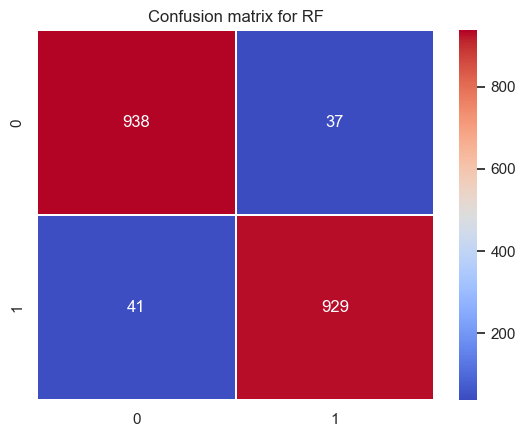

In [269]:
sns.heatmap(conv[Higher_model], annot=True , cmap='coolwarm' , linewidths = 0.01 , fmt='g')
plt.title(f"Confusion matrix for {Higher_model}")
plt.show()

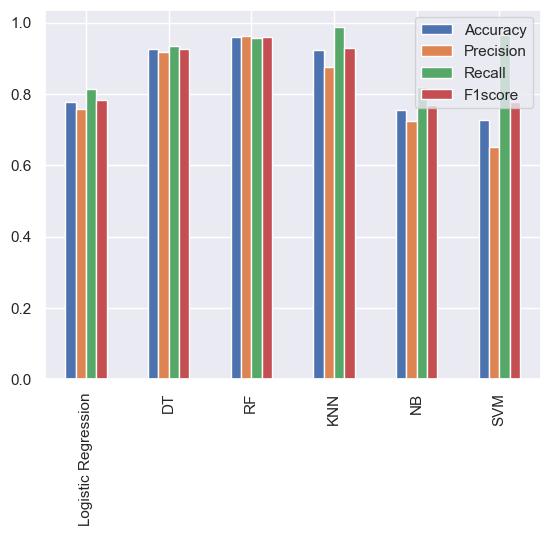

In [270]:
Result.plot.bar()
plt.xticks(ticks=range(len(Result)), labels=Result['Models'])
plt.show()